# Практическая работа №3: Кластерный анализ.  
Выполнила студентка группы 0373: Казанова Анастасия. Вариант 9.

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.


## Основные теоретические положения

*Кластерный анализ* - задача разбиения заданной выборки на подмножества (кластеры), так, чтобы кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.  
Таким образом, можно классифицировать объекты или события в относительно однородные группы.  

*Основные цели кластерного анализа:*  
1. Получение информации о данных, их понимание при помощи выявления кластерной структуры.  
2. Сжатие данных. Можно оставить от каждого кластера по одному самому типичному представителю.  
3. Выделение нетипичных объектов, которые невозможно определить ни к какому из имеющихся кластеров.  

*Этапы кластеризации:*  
1. Отбор выборки объектов для кластеризации.  
2. Определение множества переменных, по которым будут оцениваться обхекты в выборке. При необходимости - нормализация значений переменных.  
3. Вычисление меры сходства между объектами.  
4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).   
5. Предоставление результатов анализа.  

*Метрика* - неотрицательная вещественная функция $d(x, y)$, если:  
* $d(x, y) \geq 0$  
* $d(x, y) = d(y, x)$  
* $d(x, y) \leq d(x, z) + d(z, y)$  

*Функции расстояния:*  
1. Евклидово расстояние: $d(x, y) = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}$  

2. Квадрат евклидова расстояния: $d^2(x, y) = \sum_{i=1}^n(x_i - y_i)^2$  

3. Обобщенное степенное расстояние Минковского: $d_p(x, y) = (\sum_{i=1}^n(x_i - y_i)^p)^{1/p}$  

4. Расстояние Чебышёва: $d(x, y) = max \left| x_i - y_i \right|, i \in [1, n]$  

5. Манхэттенское расстояние: $d(x, y) = \sum_{i=1}^n\left| x_i - y_i \right|$  

*Метод k-means:*  
* Суть - минимизация суммарного квадратичного отклонения точек кластеров от центров кластеров.  
* Критерий - минимальное расстояние внутри кластера относительно среднего.  
* Основная идея: на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге. Затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.  
* Все кластеры стабилизированы - алгоритм завершается.  

*Алгоритм k-means:*  
1. Случайно выбрать k точек, являющихся начальными центроидами кластеров.  
2. Отнести каждый объект к кластеру с ближайшим центроидом.  
3. Пересчитать центроиды кластеров согласно текущему членству.  
4. Если критерий остановки алгоритма не удовлетворен, то переход к п.2. 

*Метод k-medians:*

Данный метод является вариацией k-means, где для определения центра кластера вместо среднего вычисляется медиана по каждому из измерений.  
Алгоритм дает более качественную кластеризацию, если k-means с этим не справился.    

*Метод k-medoids:*  

* В отличие от k-means использует для представления центра кластера не центр масс, а представительный объект (один из объектов кластера).  
* Каждый из оставшихся объектов объединяется в кластер с ближайшим медоидом (представительным объектом).  
* Алгоритм выполняется, пока снижается стоимость выбора нового медоида.  
* Необходимо определить точку, принадлежащую кластеру, расстояние которой до всех других точек минимально.  

*Оценка количества кластеров:*  
* Количество кластеров влияет на качество анализа.  
* Верхняя оценка количества кластеров для небольших множеств: $k = \left \lfloor \sqrt{\frac{n}{2}} \right \rfloor$  

*Метод локтя:*  
* Подразумевает многократное циклическое исполнение алгоритма с увеличением количества выбираемых кластеров, а также последующим откладыванием на графике разброса кластеризации, вычисленного как функция от количества кластеров.  

* $W_{C_{j}} = \sum_{x_i \in C_j}(x_i - x_{C_{j}})^2$, где  
$W_{C_{j}}$ - разброс внутри кластера;  
$x_{C_{j}}$ - центр кластера;  
$C_j$ - множество элементов кластеров.  

* С увеличением количества кластеров разброс стремится к нулю: $W = \sum_{j=1}^{k}W_{C_j}$  

* После представления разброса при различных количествах кластеров на графике, необходимо определить, при каком количестве кластеров последующий разброс будет уменьшаться с наименьшей степенью.  

*Коэффициент силуэта*  
Вычисляется с помощью внутрикластерного расстояния $a$ и среднего расстояния до ближайшего кластера $b$ по каждому кластеру:  

$s_i = \frac{b_i - a_i}{max\left\{ a_i; b_i \right\}}$, где  

$a_i = \frac{1}{\sharp C_j - 1} \sum_{x_j \in C_j} d(x_j, x_{C_{j}})$,  

$b_i = min \frac{1}{\sharp C_j}\sum_{x_j \in C_j} d(x_j, x_{C_{j}}), j\neq i$  

Если $\sharp C_j = 1$, то $s_i = 0$.  

*Метод поиска сгущений FOREL* - итерационный алгоритм, основная идея которого заключается в объединении в один кластер объектов в областях их наибольшего сгущения.  

Выбор радиуса:  

$R_{min} < R < R_{max}$  
$R_{min} = min(d_{ij} > 0)$  
$R_{max} = max(d_{ij})$, где   
$D = {d_{ij}}$ - симметричная матрица расстояний между точками.  




## Выполнение работы

In [22]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
import scipy.stats
import seaborn as sns
import random 
import copy
import matplotlib.markers

### **Задание №1.** Нормализовать множество точек, отобразить полученное множество.

Проведем процедуру нормализации с помощью z-вклада: сколько стандартных отклонений отделяет наблюдение от среднего значения:   
 $z_i = \frac{x_i - \bar{x}}{\sigma}$  

In [23]:
bivariate_sampling = pd.read_csv("forestfires.csv") 
n = 115
selection_X = bivariate_sampling[["temp"]]
selection_Y = bivariate_sampling[["wind"]]
x_mean = np.sum(selection_X)/n
y_mean = np.sum(selection_Y)/n
sko_x = 0
sko_y = 0
for i in range (n):
    sko_x += (bivariate_sampling["temp"][i] - x_mean)**2
    sko_y += (bivariate_sampling["wind"][i] - y_mean)**2
sko_x = math.sqrt(sko_x/n)
sko_y = math.sqrt(sko_y/n)
array_norm_x = []
array_norm_y = []
for i in range (n):
    array_norm_x.append(((bivariate_sampling["temp"][i] - x_mean)/sko_x)[0])
    array_norm_y.append(((bivariate_sampling["wind"][i] - y_mean)/sko_y)[0])
table = pd.DataFrame(columns=["norm X", "norm Y"])
table["norm X"] = array_norm_x
table["norm Y"] = array_norm_y
array_dots = np.column_stack((array_norm_x, array_norm_y))
table

,norm X,norm Y
0,-0.685319,-1.458350
1,0.984420,-0.527488
2,0.140762,-0.062057
3,0.773506,0.661946
4,-0.035000,-0.734346
...,...,...
110,2.478398,-0.527488
111,0.545015,0.403373
112,1.441402,-1.199777
113,-0.052576,0.661946


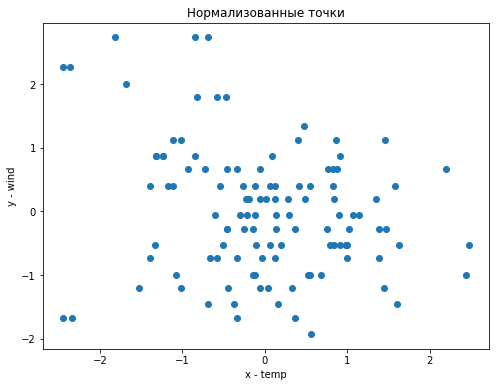

In [24]:
plt.figure(figsize=(8, 6))
plt.title("Нормализованные точки")
plt.xlabel("x - temp")
plt.ylabel("y - wind")
plt.scatter(array_norm_x, array_norm_y)
plt.show()

### **Задание №2.** Определить «грубую» верхнюю оценку количества кластеров $\tilde{k}$

In [25]:
k = math.floor(math.sqrt(n/2))
print(f' k = {k}')

 k = 7


Верхняя оценка количества кластеров - 7.

### **Задание №3.** Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [ ]:
def euclid(x, y):
    return (np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2))

In [27]:
def k_means (n, k):
	cluster = {}
	cluster_size = []
	centroid_arr = []
	cluster = [[] for i in range (k)]
	centroid = {}
	index_centr = []
	index_centr = [4, 30, 45, 50, 70, 90, 105] #в методе точки случайные, в данном случае "рандомно" выбрали из точек множества
	for i in range (k):
			centroid[i] = [array_dots[index_centr[i]][0], array_dots[index_centr[i]][1]] 
	prev_centroids = copy.deepcopy(centroid)
	cluster_changed = True
	while cluster_changed:
		cluster_changed = False
		for i in range(n):
			distance = []
			for j in range (k):
				distance.append(euclid(array_dots[i], centroid[j]))
			cluster[np.argmin(distance)].append(array_dots[i])
			
		for i in range(k):
			if (len(cluster[i]) != 0):
				centroid[i]=[np.mean(np.array(cluster[i])[:,0]),np.mean(np.array(cluster[i])[:,1])]

			if (prev_centroids == centroid):
				cluster_changed = True
		prev_centroids = copy.deepcopy(centroid)
		
	for i in range (k):
		cluster_size.append(len(cluster[i]))
		centroid_arr.append([round(centroid[i][0], 4), round(centroid[i][1], 4)])

	return cluster, centroid, cluster_size, centroid_arr

	

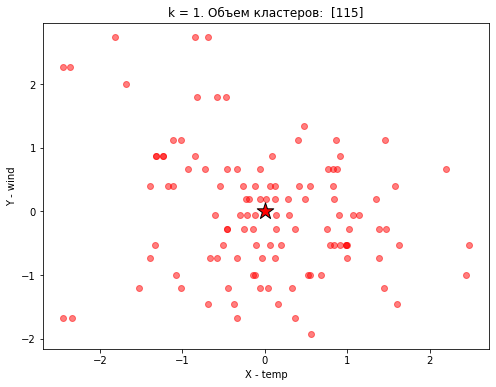

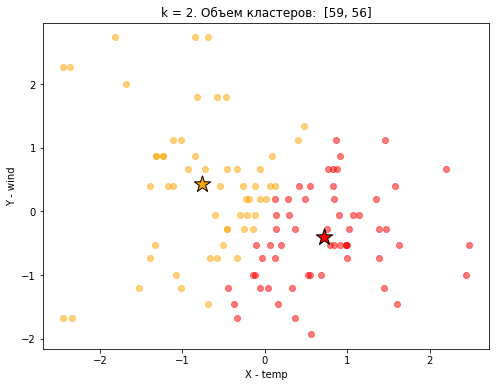

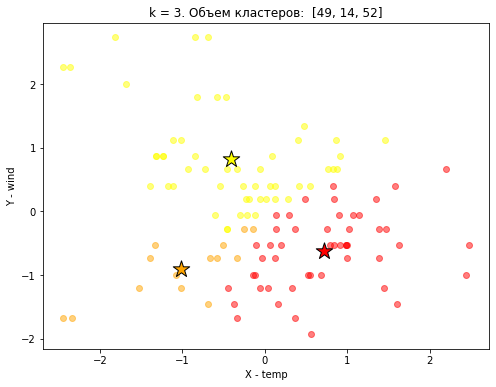

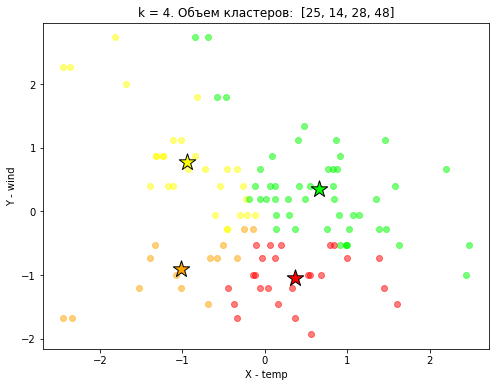

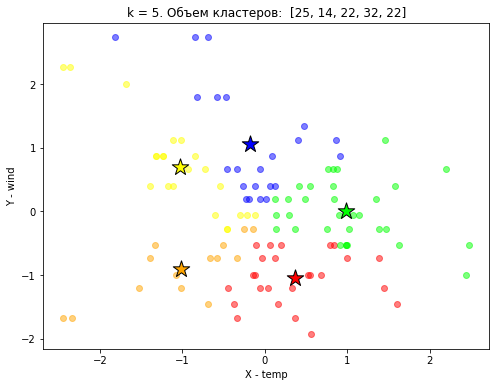

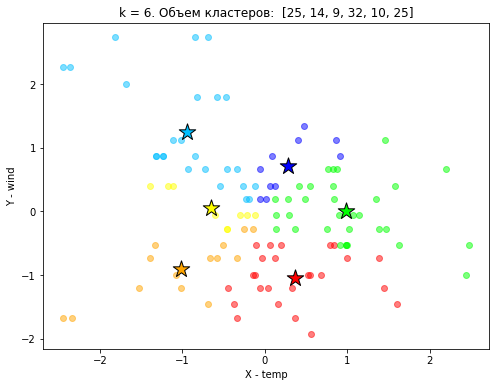

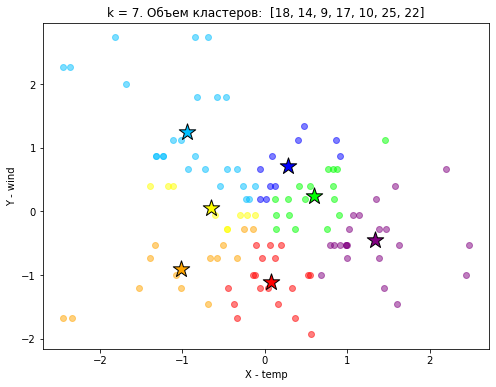

In [28]:
def clasterization(k, clusters, centroids):
    colors=["red", "orange", "yellow", "lime", "blue", "deepskyblue", "purple"]
    plt.figure(figsize = (8, 6))
    plt.xlabel("X - temp")
    plt.ylabel("Y - wind")
    for i in range(k):
        for j in range(len(clusters[i])):
            plt.scatter(clusters[i][j][0], clusters[i][j][1], c=colors[i], alpha=0.5)
        plt.scatter(round(centroids[i][0], 4), round(centroid[i][1], 4), c=colors[i], marker="*", edgecolors = "black", linewidths=1, s=300)
        plt.title(f"k = {i+1}. Объем кластеров:  {[len(i) for i in clusters]}")
    plt.show()
    
for i in range(1, k+1):
    cluster, centroid, cluster_size_means, centroid_arr_means = k_means(n,i)
    clasterization(i, cluster, centroid)

### **Задание №4.** Реализовать алгоритмы k-medians для нечётного варианта. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [29]:
def manhattan (x, y):
    dist = abs(x[0] - y[0]) + abs(x[1] - y[1])
    return dist

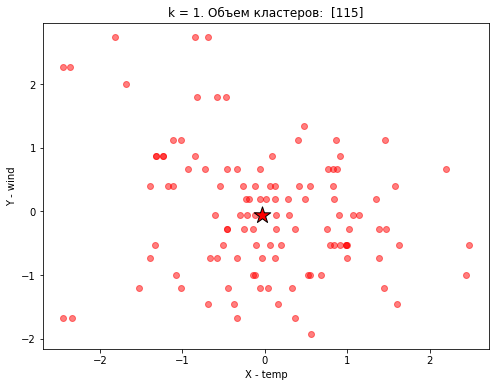

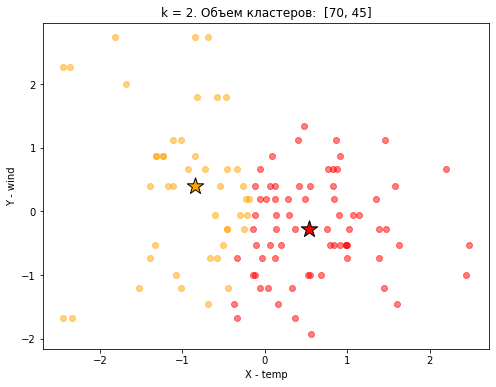

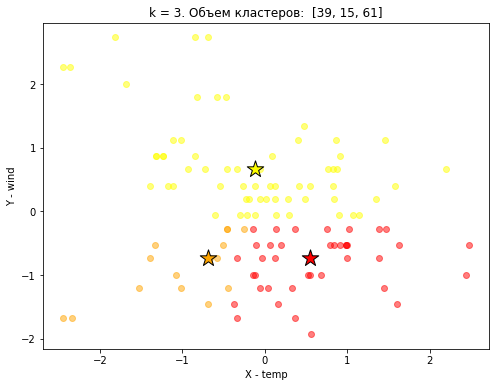

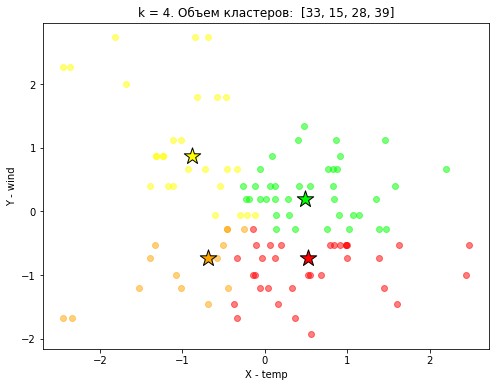

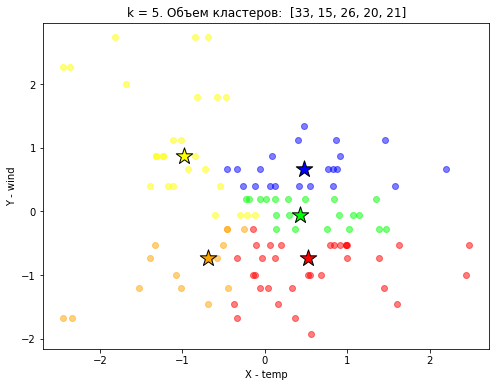

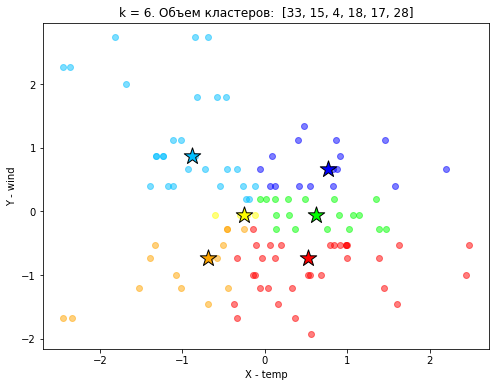

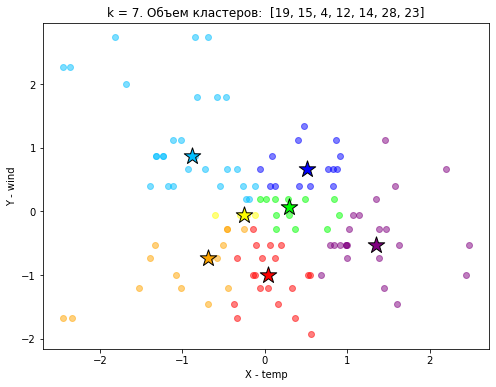

In [30]:
def k_medians(n, k):
	cluster={}
	cluster = [[] for i in range (k)]
	centroid={}
	index_centr = []
	index_centr = [4, 30, 45, 50, 70, 90, 105]
	for i in range(k):
		centroid[i] = [array_dots[index_centr[i]][0], array_dots[index_centr[i]][1]]
	prev_centroids = copy.deepcopy(centroid)
	cluster_changed = True
	while cluster_changed:
		cluster_changed = False
		for i in range(n):
			distance = []
			for j in range (k):
				distance.append(manhattan(array_dots[i], centroid[j]))
			cluster[np.argmin(distance)].append(array_dots[i])
		for i in range(k):
			if (len(cluster[i]) != 0):
				centroid[i] = [np.median(np.array(cluster[i])[:,0]), np.median(np.array(cluster[i])[:,1])]
			if (prev_centroids == centroid):
				cluster_changed = True
		prev_centroids = copy.deepcopy(centroid)
	cluster_size = []	
	centroid_arr = []
	for i in range (k):
		cluster_size.append(len(cluster[i]))
		centroid_arr.append([round(centroid[i][0], 4), round(centroid[i][1], 4)])

	return cluster, centroid, cluster_size, centroid_arr

for i in range(1, k+1):
    cluster, centroid, cluster_size_med, centroid_arr_med = k_medians(n,i)
    clasterization(i, cluster, centroid)


	

### **Задание №5.** Для каждого метода заполнить таблицу, где $k \in [1, \tilde{k}]$

In [31]:
columns_names = ["Значение k", "Центроиды кластера", "Объем кластера"]
table_means = pd.DataFrame(columns=columns_names)
for i in range(k):
    table_means["Значение k"] = list(range(1, k+1))
cluster_size = []
centroid_arr = []
for i in range (1, k+1):
    cluster_size.append(k_means(n,i)[2])
    centroid_arr.append(k_means(n,i)[3])
table_means["Объем кластера"] = cluster_size
table_means["Центроиды кластера"] = centroid_arr
table_means = table_means.style.hide()

table_medians = pd.DataFrame(columns=columns_names)
for i in range(k):
    table_medians["Значение k"] = list(range(1, k+1))
cluster_size = []
centroid_arr = []
for i in range (1, k+1):
    cluster_size.append(k_medians(n,i)[2])
    centroid_arr.append(k_medians(n,i)[3])
table_medians["Объем кластера"] = cluster_size
table_medians["Центроиды кластера"] = centroid_arr
table_medians = table_medians.style.hide()



**Метод k-means:**

In [32]:
table_means

Значение k,Центроиды кластера,Объем кластера
1,"[[0.0, 0.0]]",[115]
2,"[[0.722, -0.4048], [-0.7606, 0.4265]]","[59, 56]"
3,"[[0.7247, -0.6161], [-1.0205, -0.908], [-0.4082, 0.825]]","[49, 14, 52]"
4,"[[0.3629, -1.0467], [-1.0205, -0.908], [-0.9458, 0.7765], [0.6604, 0.357]]","[25, 14, 28, 48]"
5,"[[0.3629, -1.0467], [-1.0205, -0.908], [-1.0257, 0.6949], [0.9921, 0.0091], [-0.1804, 1.0592]]","[25, 14, 22, 32, 22]"
6,"[[0.3629, -1.0467], [-1.0205, -0.908], [-0.6463, 0.0471], [0.9921, 0.0091], [0.2849, 0.7188], [-0.9426, 1.2391]]","[25, 14, 9, 32, 10, 25]"
7,"[[0.0734, -1.1107], [-1.0205, -0.908], [-0.6463, 0.0471], [0.5926, 0.2421], [0.2849, 0.7188], [-0.9426, 1.2391], [1.3375, -0.4546]]","[18, 14, 9, 17, 10, 25, 22]"


**Метод k-medians:**

In [33]:
table_medians

Значение k,Центроиды кластера,Объем кластера
1,"[[-0.035, -0.0621]]",[115]
2,"[[0.5362, -0.2689], [-0.8435, 0.4034]]","[70, 45]"
3,"[[0.545, -0.7343], [-0.6853, -0.7343], [-0.1229, 0.6619]]","[39, 15, 61]"
4,"[[0.5274, -0.7343], [-0.6853, -0.7343], [-0.8874, 0.8688], [0.4923, 0.1965]]","[33, 15, 28, 39]"
5,"[[0.5274, -0.7343], [-0.6853, -0.7343], [-0.9753, 0.8688], [0.4308, -0.0621], [0.4747, 0.6619]]","[33, 15, 26, 20, 21]"
6,"[[0.5274, -0.7343], [-0.6853, -0.7343], [-0.2547, -0.0621], [0.6241, -0.0621], [0.7735, 0.6619], [-0.8874, 0.8688]]","[33, 15, 4, 18, 17, 28]"
7,"[[0.0353, -0.9929], [-0.6853, -0.7343], [-0.2547, -0.0621], [0.2902, 0.0672], [0.5099, 0.6619], [-0.8874, 0.8688], [1.3535, -0.5275]]","[19, 15, 4, 12, 14, 28, 23]"


### **Задание №6.** С помощью метода силуэтов для нечётных вариантов выявить для каждого метода оптимальное количество кластеров.

In [34]:
def silhouette_method (method, metric, k):
    plt.figure(figsize = (8, 6))
    plt.xlabel("Количество кластеров")
    plt.ylabel("Коэффициент силуэтов")
    plt.grid(True)
    for i in range(2, k+1):
        array_a, array_b = [], []
        s_fact = 0
        cluster = method(n, i)[0]
        for j in range(i):
            for k in range(len(cluster[j])):
                arr_bi=[]
                a=0
                for l in range(len(cluster[j])):
                    if k != l:
                        a = a + metric(cluster[j][k], cluster[j][l])
                array_a.append(a/(len(cluster[j])-1))

                for m in range(i):
                    if j!=m:
                        b=0
                        for p in range(len(cluster[m])):
                            b = b + metric(cluster[j][k], cluster[m][p])
                        arr_bi.append(b/len(cluster[m]))
                
                array_b.append(min(arr_bi))
        for q in range(n):
            s_fact+=((array_b[q] - array_a[q]) / max(array_b[q],array_a[q]))/n
        plt.scatter(1, 0, c="r")
        plt.scatter(i, s_fact, c = "r")
        plt.show
                

**Метод силуэтов для k-means:**

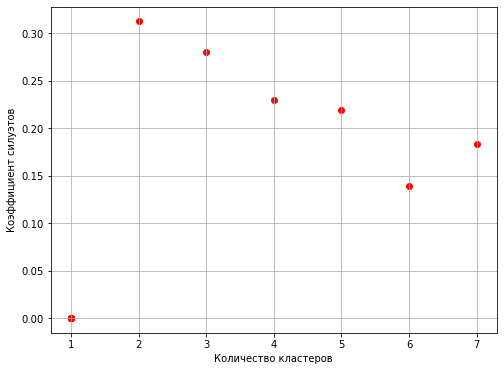

In [35]:
silhouette_method(k_means, euclid, k)

**Метод силуэтов для k-medians:**

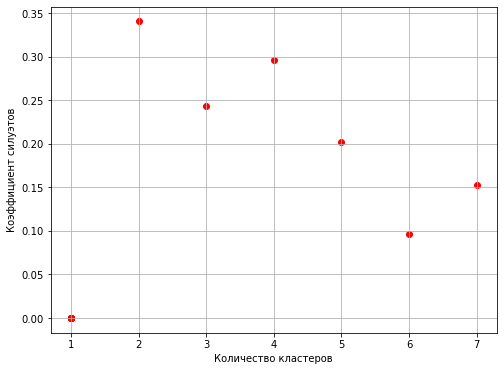

In [36]:
silhouette_method(k_medians, manhattan, k)

Наблюдается пиковое значение при k = 2. Следовательно, и для метода k-means, и для метода k-medians оптимальное количество кластеров - 2.  

### **Задание №7.** Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы.

In [37]:
def forel(R):
    u = [[array_dots[i][0], array_dots[i][1]] for i in range (n)]
    cluster, centroid = {}, {}
    k = 0
    while(len(u) > 0):
        cluster_changed = True
        x_c = u[0]
        while cluster_changed:
            u_0 = 0
            u_1 = 0
            cluster[k]=[]
            for i in range(len(u)):
                if euclid(x_c, u[i]) <= R:
                    u_0 += u[i][0]
                    u_1 += u[i][1]
                    cluster[k].append(u[i])

            new_x_c = x_c
            x_c = [1/(len(cluster[k])) * u_0, 1 / len(cluster[k]) * u_1]
    
            if x_c == new_x_c:
                centroid[k] = x_c
                cluster_changed = False
                
        for i in cluster[k]:
            if i in u:
                u.remove(i)
        k += 1
    cluster_size = []
    centroid_arr = []
    for i in range (k):
        cluster_size.append(len(cluster[i]))
        centroid_arr.append([round(centroid[i][0], 4), round(centroid[i][1], 4)])
    return k, cluster, centroid, cluster_size, centroid_arr


In [38]:
R_max = -100
R_min = 10000
for i in range (n-1):
    for j in range (i+1, n):
            d = euclid(array_dots[i], array_dots[j])
            if d > 0:
                if R_max < d:
                    R_max = d
                if R_min > d:
                    R_min = d
R_max = round(R_max, 4)
R_min = round(R_min, 4)
print(f' R_max = {R_max}')
print(f' R_min = {R_min}')

 R_max = 5.8728
 R_min = 0.0176


Таким образом, для кластеризации радиус выбирается в промежутке: $R_{min} < R < R_{max}$  
$R \in (0.0176, 5.8728)$

In [39]:
def clasterization_forel(k, clusters, centroids):
    colors=["red", "orange", "yellow", "lime", "blue", "deepskyblue", "purple", "pink", "black", "grey"]
    plt.figure(figsize = (8, 6))
    plt.xlabel("X - temp")
    plt.ylabel("Y - wind")
    for i in range(k):
        for j in range(len(clusters[i])):
            plt.scatter(clusters[i][j][0], clusters[i][j][1], alpha=0.5, c=colors[i])
        plt.scatter(round(centroids[i][0], 4), round(centroid[i][1], 4), marker="*", edgecolors = "black", linewidths=1, s=300, c=colors[i])
        plt.title(f"k = {i+1}")
    plt.show()


Выберем значения радиусов таким образом, чтобы получить оптимальное разбиение множества на кластеры. При R, близком к $R_{min}$, мы получим слишком много кластеров с единичными точками; при R, близких к $R_{max}$, кластеризация будет одинаковой (один класс). Возьмем значения R от 1,5 до значения, близкого к максимальному. 

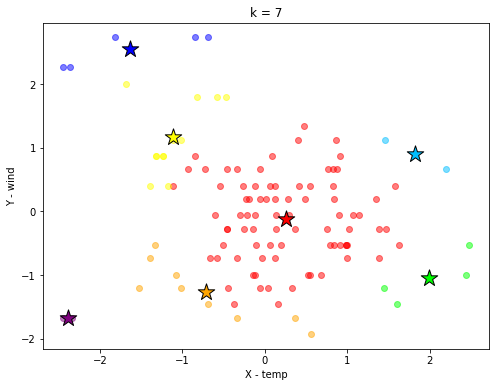

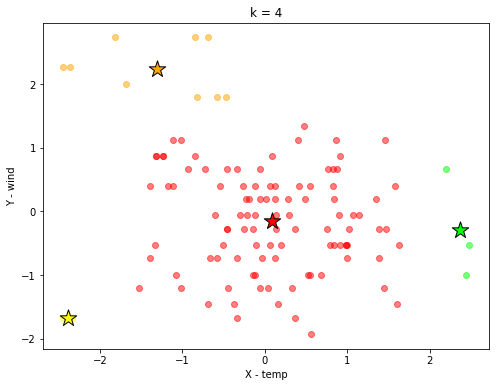

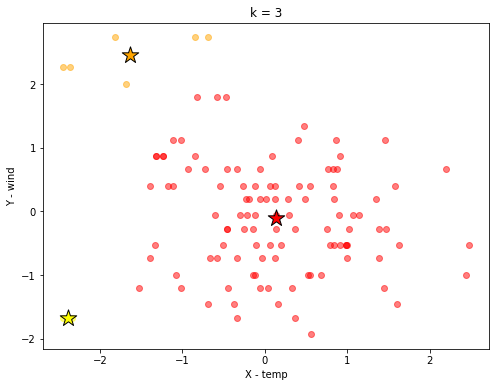

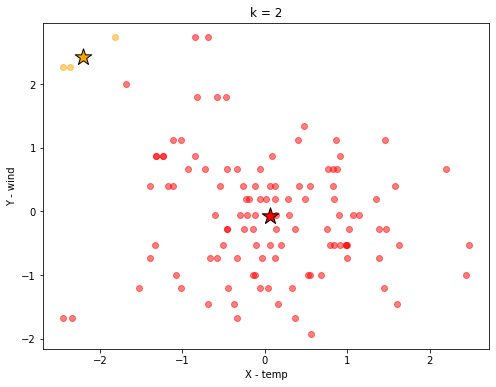

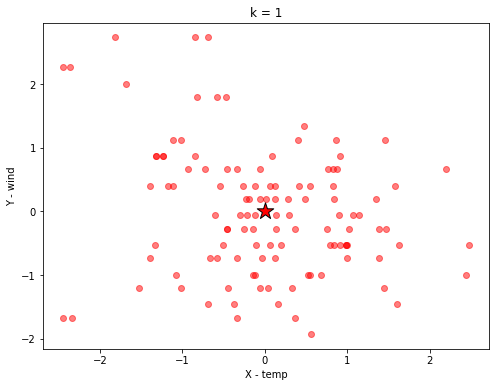

In [40]:
R = [1.5, 2, 2.5, 3, 5.8]
for i in range(len(R)):
    k, cluster, centroid, cluster_size, centroid_arr = forel(R[i])
    clasterization_forel(k, cluster, centroid)

In [41]:
table_forel = pd.DataFrame(columns=["Значение R", "Центроиды кластера", "Объем кластера"])
table_forel["Значение R"] = R
cluster_size = []
centroid_arr = []
for i in range(len(R)):
    cluster_size.append(forel(R[i])[3])
    centroid_arr.append(forel(R[i])[4])
table_forel["Объем кластера"] = cluster_size
table_forel["Центроиды кластера"] = centroid_arr
table_forel = table_forel.style.hide()
table_forel

Значение R,Центроиды кластера,Объем кластера
1.500000,"[[0.2603, -0.1182], [-0.7146, -1.263], [-1.113, 1.1619], [1.9907, -1.0446], [-1.6274, 2.5444], [1.8281, 0.8947], [-2.3902, -1.6652]]","[81, 9, 12, 4, 5, 2, 2]"
2.000000,"[[0.0927, -0.1578], [-1.3005, 2.2364], [-2.3902, -1.6652], [2.3729, -0.2862]]","[101, 9, 2, 3]"
2.500000,"[[0.1365, -0.1065], [-1.6374, 2.4547], [-2.3902, -1.6652]]","[107, 6, 2]"
3.000000,"[[0.059, -0.0648], [-2.2027, 2.4202]]","[112, 3]"
5.800000,"[[0.0, 0.0]]",[115]


### **Задание №8.** Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

Возьмем $\varepsilon = 0.001$ и пересчитаем кластеры с $\tilde{R} = R + \varepsilon$.

In [42]:
table_forel_e = pd.DataFrame(columns=["Значение R", "Центроиды кластера", "Объем кластера"])
cluster_size = []
centroid_arr = []
for i in range(len(R)):
    R[i] = R[i] + 0.001
    cluster_size.append(forel(R[i])[3])
    centroid_arr.append(forel(R[i])[4])
table_forel_e["Значение R"] = R
table_forel_e["Объем кластера"] = cluster_size
table_forel_e["Центроиды кластера"] = centroid_arr
table_forel_e = table_forel_e.style.hide()
table_forel_e

Значение R,Центроиды кластера,Объем кластера
1.501000,"[[0.2603, -0.1182], [-0.7146, -1.263], [-1.113, 1.1619], [1.9907, -1.0446], [-1.6274, 2.5444], [1.8281, 0.8947], [-2.3902, -1.6652]]","[81, 9, 12, 4, 5, 2, 2]"
2.001000,"[[0.0927, -0.1578], [-1.3005, 2.2364], [-2.3902, -1.6652], [2.3729, -0.2862]]","[101, 9, 2, 3]"
2.501000,"[[0.1365, -0.1065], [-1.6374, 2.4547], [-2.3902, -1.6652]]","[107, 6, 2]"
3.001000,"[[0.059, -0.0648], [-2.2027, 2.4202]]","[112, 3]"
5.801000,"[[0.0, 0.0]]",[115]


Можно сделать вывод, что метод сгущений не чувствителен к погрешностям, так как центроиды кластеров и их объем не изменились. Следовательно, проверять с еще меньшими значениями $\varepsilon$ нет необходимости.  

### **Задание №9.** Сравнить методы и сделать выводы.  

* Результаты выполнения кластеризации методами k-means и k-medians очень похожи, так как данные методы различаются лишь метрикой (евклидово и манхэттенское расстояние) и способом определения центра кластера (среднее и медиана).

* Метод FOREL показывает наилучшие результаты в выборках с ярковыраженными локальными сгустками, то есть когда четко определяются границы кластеров. В данном случае этого нет, возникает проблема выбора подходящего радиуса. В результате выполнения алгоритма всегда выделяется один крупный кластер, тогда как остальные имеют намного меньший объем. 

* Следовательно, для данной выборки предпочтительнее будут методы k-means и k-средних. 

## Выводы

* В ходе выполнения данной практической работы были реализованы следующие методы: k-means, k-medians, FOREL и метод силуэтов определения оптимального количества кластеров. 

* Методы k-means и k-medians оказались очень похожими в реализации и показывают результаты с незначительными отличиями.  

* По методу силуэтов выяснили оптимальное число кластеров, равное двум, тогда как методы выполнялись для 7 кластеров. 

* Реализовали метод сгущений и увидели, что для данной выборки лучше работают предыдущие два алгоритма.  